In [12]:
import numpy as np
import os 
import cv2

In [62]:
original_train_images = []
original_train_labels = []
path = r'C:\Users\Dogo\Documents\Machine Learning\Brain tumor prediction\agyikepek_4_osztaly\agyikepek_4_osztaly\Training'

for classes in os.listdir(path):
    for image in os.listdir(os.path.join(path,classes)):
        original_train_labels.append(classes)
        img_path = os.path.join(path,classes,image)
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128,128))

        original_train_images.append(img)

original_test_images = []
original_test_labels = []
path = r'C:\Users\Dogo\Documents\Machine Learning\Brain tumor prediction\agyikepek_4_osztaly\agyikepek_4_osztaly\Testing'


for classes in os.listdir(path):
    for image in os.listdir(os.path.join(path,classes)):
        original_test_labels.append(classes)
        img_path = os.path.join(path,classes,image)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128,128))
        original_test_images.append(img)



C:\Users\Dogo\Documents\Machine Learning\Brain tumor prediction\agyikepek_4_osztaly\agyikepek_4_osztaly\Training\glioma\Tr-glTr_0000.jpg
C:\Users\Dogo\Documents\Machine Learning\Brain tumor prediction\agyikepek_4_osztaly\agyikepek_4_osztaly\Training\glioma\Tr-glTr_0001.jpg
C:\Users\Dogo\Documents\Machine Learning\Brain tumor prediction\agyikepek_4_osztaly\agyikepek_4_osztaly\Training\glioma\Tr-glTr_0002.jpg
C:\Users\Dogo\Documents\Machine Learning\Brain tumor prediction\agyikepek_4_osztaly\agyikepek_4_osztaly\Training\glioma\Tr-glTr_0003.jpg
C:\Users\Dogo\Documents\Machine Learning\Brain tumor prediction\agyikepek_4_osztaly\agyikepek_4_osztaly\Training\glioma\Tr-glTr_0004.jpg
C:\Users\Dogo\Documents\Machine Learning\Brain tumor prediction\agyikepek_4_osztaly\agyikepek_4_osztaly\Training\glioma\Tr-glTr_0005.jpg
C:\Users\Dogo\Documents\Machine Learning\Brain tumor prediction\agyikepek_4_osztaly\agyikepek_4_osztaly\Training\glioma\Tr-glTr_0006.jpg
C:\Users\Dogo\Documents\Machine Learning\

In [45]:
from sklearn.preprocessing import LabelEncoder

train_images = np.array(original_train_images)/255.0
test_images = np.array(original_test_images)/255.0

lb = LabelEncoder()

train_labels = np.array(lb.fit_transform(original_train_labels))
test_labels = np.array(lb.transform(original_test_labels))

mapped_classes = dict(zip(lb.classes_, range(len(lb.classes_))))
print (mapped_classes)

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


((5599, 128, 128), (1311, 128, 128), (5599,), (1311,))

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay 

def Evaluate_metrics (y_test, y_pred,classes):
    accuracy = accuracy_score(y_test,y_pred)
    class_report = classification_report(y_test,y_pred)
    cm =confusion_matrix(y_test,y_pred)

    
        
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes.keys())
    disp.plot()

    
    print(f"Accuracy score:{accuracy}")
    print(f"Class report:{class_report}")

In [47]:
Collapsed_train_images = train_images.reshape(train_images.shape[0],-1)
Collapsed_test_images = test_images.reshape(test_images.shape[0],-1)

train_images.shape,test_images.shape

((5599, 128, 128), (1311, 128, 128))

Accuracy score:0.8627002288329519
Class report:              precision    recall  f1-score   support

           0       0.73      0.95      0.83       300
           1       0.92      0.60      0.72       306
           2       0.92      0.94      0.93       405
           3       0.92      0.94      0.93       300

    accuracy                           0.86      1311
   macro avg       0.87      0.86      0.85      1311
weighted avg       0.88      0.86      0.86      1311



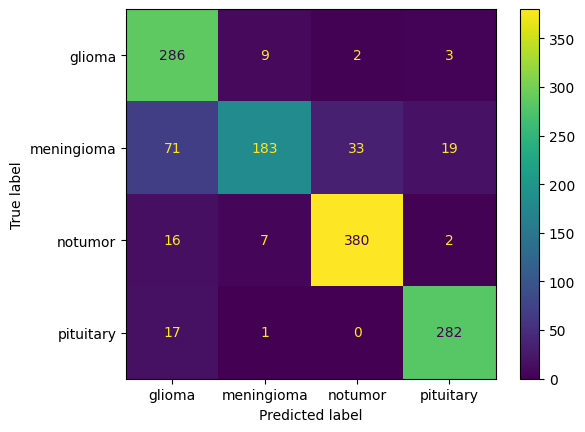

In [51]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=4)

KNN.fit(Collapsed_train_images,train_labels)

pred_labels =KNN.predict(Collapsed_test_images)

Evaluate_metrics(test_labels, pred_labels,mapped_classes)

Accuracy score:0.9344012204424104
Class report:              precision    recall  f1-score   support

           0       0.96      0.84      0.89       300
           1       0.83      0.92      0.87       306
           2       0.98      1.00      0.99       405
           3       0.96      0.96      0.96       300

    accuracy                           0.93      1311
   macro avg       0.93      0.93      0.93      1311
weighted avg       0.94      0.93      0.93      1311



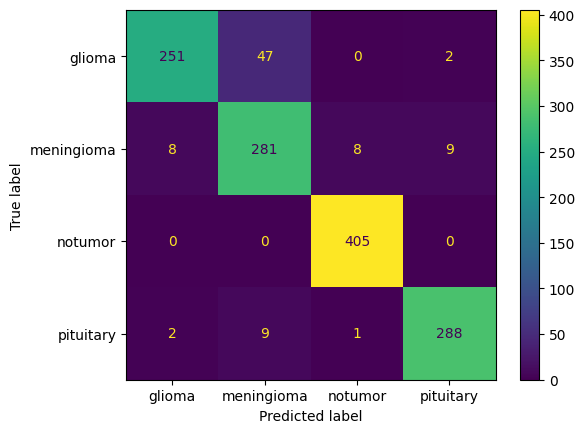

In [49]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=300,random_state=42, max_depth=20)

RF.fit(Collapsed_train_images,train_labels)

pred_labels = RF.predict(Collapsed_test_images)

Evaluate_metrics(test_labels,pred_labels,mapped_classes)

Accuracy score:0.9458428680396643
Class report:              precision    recall  f1-score   support

           0       0.96      0.87      0.91       300
           1       0.87      0.92      0.90       306
           2       0.98      1.00      0.99       405
           3       0.97      0.97      0.97       300

    accuracy                           0.95      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.95      0.95      0.95      1311



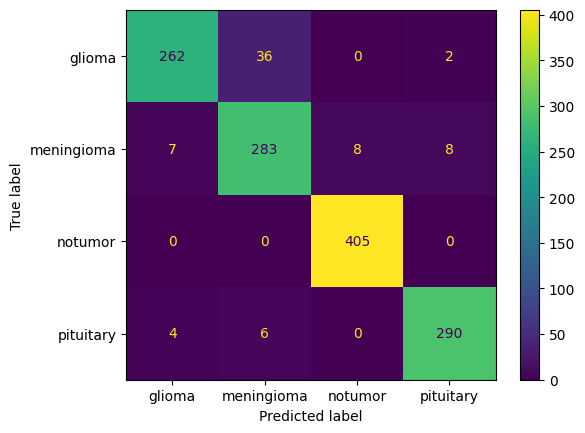

In [53]:
from xgboost import XGBClassifier

xg = XGBClassifier(objective="multi:softprob",eval_metric="pre", n_estimators=200, max_depth=5, learning_rate=0.07, subsample=0.85, colsample_bytree=0.9,verbosity=2, random_state=42)
xg.fit(Collapsed_train_images,train_labels)
pred_labels = xg.predict(Collapsed_test_images)

Evaluate_metrics(test_labels,pred_labels,mapped_classes)

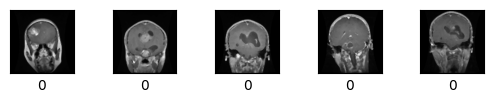

In [63]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
filterd_train_images = []

for images in original_train_images:
    filterd_train_images.append(cv2.medianBlur(images,ksize=3))

filtered_test_images = []

for images in original_test_images:
    filtered_test_images.append(cv2.medianBlur(images,ksize=3))

for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(filterd_train_images[i],cmap="grey")
    plt.xlabel(train_labels[i])
plt.show()

filterd_train_images = np.array(filterd_train_images)/255.0
filtered_test_images = np.array(filtered_test_images)/255.0

X =filterd_train_images
y = train_labels


filterd_train_images, val_images, filtered_train_labels, val_labels = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

model = Sequential([Conv2D(32,(3,3),activation="relu", input_shape=(128,128,1)),
                    Conv2D(32,(3,3), activation="relu"),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.35),
                    Conv2D(64,(3,3), activation="relu"),
                    Conv2D(64,(3,3), activation="relu"),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.35),
                    Conv2D(128,(3,3), activation="relu"),
                    Conv2D(128,(3,3), activation="relu"),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.3),
                    Flatten(),
                    Dense(128, activation="relu"),
                    Dropout(0.3),
                    Dense(4, activation="softmax")
                    ])

C:\Users\Dogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.compile (
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [67]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint = ModelCheckpoint("Best_VGG.keras", monitor="val_loss",save_best_only=True,mode="min",verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=7,mode="min",verbose=1)

In [68]:
history = model.fit (filterd_train_images,filtered_train_labels, validation_data=(val_images,val_labels), epochs=30, batch_size=32, callbacks=[checkpoint,early_stopping])

Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.4677 - loss: 1.1374
Epoch 1: val_loss improved from inf to 0.49659, saving model to Best_VGG.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 50s 338ms/step - accuracy: 0.4687 - loss: 1.1357 - val_accuracy: 0.7991 - val_loss: 0.4966
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.7834 - loss: 0.5830
Epoch 2: val_loss improved from 0.49659 to 0.48825, saving model to Best_VGG.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 48s 345ms/step - accuracy: 0.7834 - loss: 0.5827 - val_accuracy: 0.7937 - val_loss: 0.4882
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.8254 - loss: 0.4541
Epoch 3: val_loss did not improve from 0.48825
140/140 ━━━━━━━━━━━━━━━━━━━━ 47s 334ms/step - accuracy: 0.8255 - loss: 0.4540 - val_accuracy: 0.7875 - val_loss: 0.4909
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.8554 - loss: 0.3685
Epoch 4: val_loss improved from 0.48825 to 0.31591, saving model to Best_VGG.ke

In [39]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels)

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9472 - loss: 0.3634


Test accuracy 0.952707827091217


In [ ]:


# plt.plot (history.history["accuracy"],label= "Train accuracy")
# plt.plot (history.history["val_accuracy"], label = "Validation accuracy")
# plt.title("Model accuracy")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator (
#           rotation_range =5,
#           width_shift_range = 0.1,
#           height_shift_range =0.1,
#           zoom_range =0.15
# )

# train_aug_images = []
# train_aug_labels = []
# normalized_images = np.array(original_train_images)/255.0
# print (normalized_images.shape)

# augmentor= datagen.flow (normalized_images,train_labels, batch_size=len(normalized_images))

# for (x_batch, y_batch) in augmentor:
#     train_aug_images = x_batch
#     train_aug_labels = y_batch
#     break

# train_aug_images = np.array(train_aug_images)

# train_aug_images = train_aug_images.reshape(train_aug_images.shape[0],-1)
# train_aug_images.shape



In [ ]:
# KNN = KNeighborsClassifier(n_neighbors=3)
# KNN.fit(train_aug_images,train_aug_labels)

# pred_labels =KNN.predict(test_images)

# # Evaluate_metrics(test_labels, pred_labels,mapped_classes)

In [ ]:
# RF = RandomForestClassifier(random_state=42,n_estimators=100)

# RF.fit(train_aug_images,train_aug_labels)

# pred_labels= RF.predict(test_images)

# Evaluate_metrics(test_labels,pred_labels,mapped_classes)